# <font color='brown'> **Proyecto 1: Information-based Models**
## <font color='rosybrown'> **Arantza Gomez Haro Gamboa**

In [44]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize

### <font color='rosybrown'> **Parameters:**

In [36]:
S = np.linspace(10, 33, 1000)
K = 60
lamb = 3
So = 19.90
pi_I = 0.4

### <font color='rosybrown'> **Price Distribution Plot:**

C:\Users\arant\AppData\Local\Temp\ipykernel_32080\943708744.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (lamb**K) * (S**(K-1)) * np.exp(-lamb*S) / np.math.factorial(K-1)


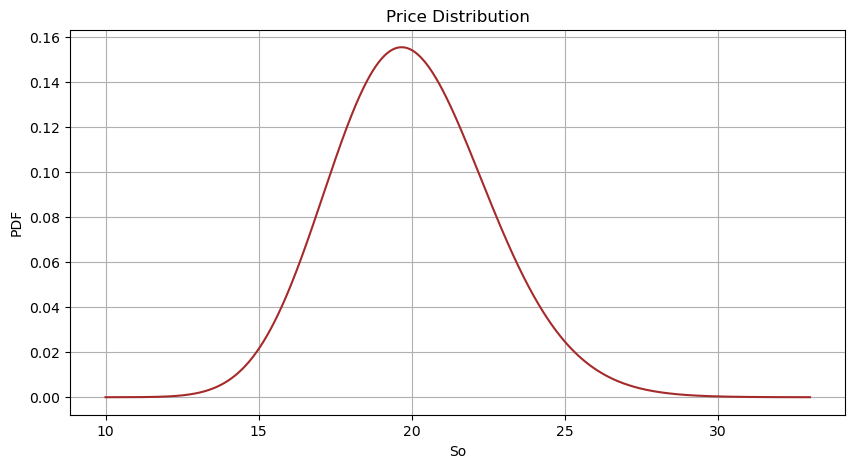

In [37]:
def pdf_fun(S, lamb, K):
    return (lamb**K) * (S**(K-1)) * np.exp(-lamb*S) / np.math.factorial(K-1)

pdf = pdf_fun(S, lamb, K)

plt.figure(figsize=(10, 5))
plt.plot(S, pdf, color='brown')
plt.title('Price Distribution')
plt.xlabel('So')
plt.ylabel('PDF')
plt.grid()
plt.show()

### <font color='rosybrown'> **Expected Revenues:**

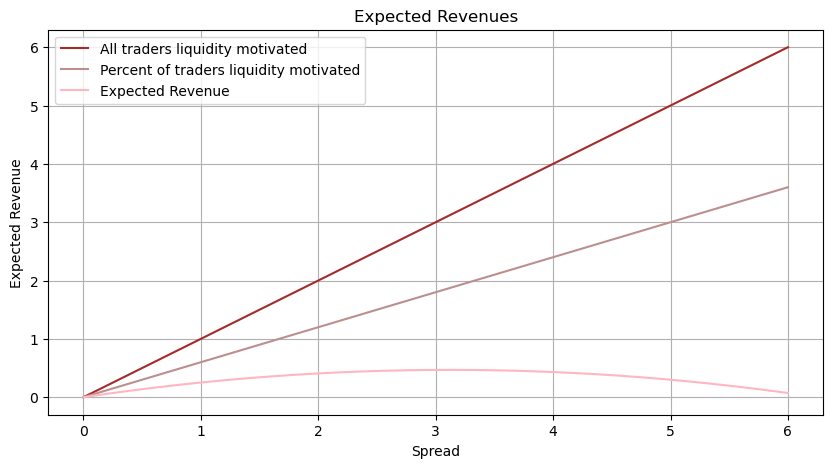

In [38]:
def pi_LB(spread, A=0.5, B=0.08):
    return np.maximum(A - B * spread, 0)

def pi_LS(spread, A=0.5, B=0.08):
    return np.maximum(A - B * spread, 0)

spread = np.linspace(0, 6, 1000)

pi_lb = pi_LB(spread)
pi_ls = pi_LS(spread)

plt.figure(figsize=(10, 5))
plt.plot(spread, spread, color='brown', label = 'All traders liquidity motivated')
plt.plot(spread, spread * (1 - pi_I), color='rosybrown', label = 'Percent of traders liquidity motivated')
plt.plot(spread, pi_lb * (1 - pi_I) * spread, color='lightpink', label = 'Expected Revenue')
plt.title('Expected Revenues')
plt.xlabel('Spread')
plt.ylabel('Expected Revenue')
plt.legend()
plt.grid()
plt.show()

### <font color='rosybrown'> **Optimal Bid / Ask:**

In [40]:
def objective(x, So, lamb, K, pi_I):
    KA, KB = x

    first = (1 - pi_I) * (pi_LB(KA - So) * (KA - So) + pi_LS(So - KB) * (So - KB))
    second = quad(lambda s: (s - KA) * pdf_fun(s, lamb, K), KA, np.inf)[0]
    third = quad(lambda s: (KB - s) * pdf_fun(s, lamb, K), 0, KB)[0]
    
    revenue = first - pi_I * (second + third)
    return -revenue

In [49]:
x0 = [20, 18]
bounds = [(So, 33), (10, So)]
result = minimize(objective, x0, args=(So, lamb, K, pi_I), bounds=bounds)
KA_opt, KB_opt = result.x

df_result = pd.DataFrame({
    'Optimal Ask': [round(KA_opt, 4)],
    'Optimal Bid': [round(KB_opt, 4)]
}, index = ['Values'])
df_result


C:\Users\arant\AppData\Local\Temp\ipykernel_32080\943708744.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (lamb**K) * (S**(K-1)) * np.exp(-lamb*S) / np.math.factorial(K-1)


,Optimal Ask,Optimal Bid
Values,23.4277,16.4517


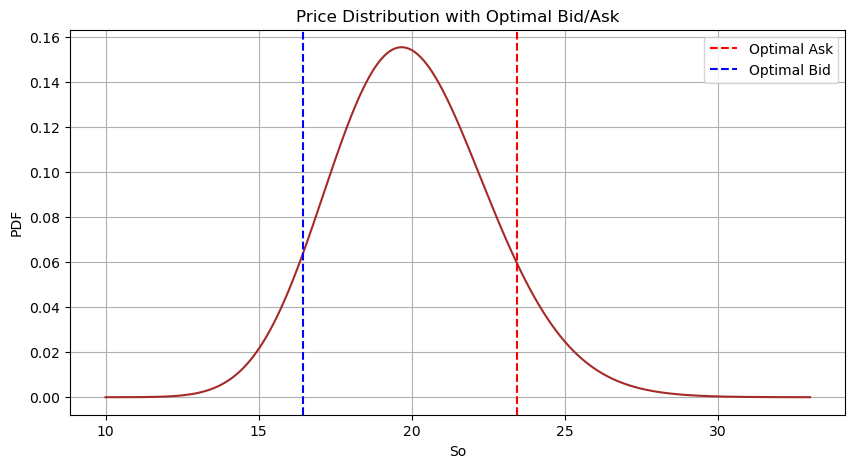

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(S, pdf, color='brown')
plt.axvline(KA_opt, color='red', linestyle='--', label='Optimal Ask')
plt.axvline(KB_opt, color='blue', linestyle='--', label='Optimal Bid')
plt.title('Price Distribution with Optimal Bid/Ask')
plt.xlabel('So')
plt.ylabel('PDF')
plt.legend()
plt.grid()
plt.show()